In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
import glob
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from influxdb import DataFrameClient

Data is taken from http://www.cryptodatadownload.com/data/apac/ for binance, hourly files

In [5]:
data = glob.glob("crypto_data/*.csv") 
print(data)

['crypto_data/Binance_XRPBTC_1h.csv', 'crypto_data/Binance_VENBTC_1h.csv', 'crypto_data/Binance_DASHBTC_1h.csv', 'crypto_data/Binance_SALTBTC_1h.csv', 'crypto_data/Binance_WTCBTC_1h.csv', 'crypto_data/Binance_ADABTC_1h.csv', 'crypto_data/Binance_ADXBTC_1h.csv', 'crypto_data/Binance_XLMBTC_1h.csv', 'crypto_data/Binance_NEOBTC_1h.csv', 'crypto_data/Binance_IOTABTC_1h.csv', 'crypto_data/Binance_LTCBTC_1h.csv', 'crypto_data/Binance_ETCBTC_1h.csv', 'crypto_data/Binance_EOSBTC_1h.csv', 'crypto_data/Binance_ETHBTC_1h.csv', 'crypto_data/Binance_ASTBTC_1h.csv', 'crypto_data/Binance_BTGBTC_1h.csv', 'crypto_data/Binance_STRATBTC_1h.csv']


In [6]:
df = pd.read_csv(data[0], skiprows=1)

In [7]:
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC
0,2019-08-21 11-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,157215.0,4.137
1,2019-08-21 10-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,949361.0,24.940
2,2019-08-21 09-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,725224.0,18.960
3,2019-08-21 08-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1931360.0,50.690
4,2019-08-21 07-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1273785.0,33.480
5,2019-08-21 06-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,999914.0,26.250
6,2019-08-21 05-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,857077.0,22.590
7,2019-08-21 04-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2852540.0,75.080
8,2019-08-21 03-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1713291.0,45.000
9,2019-08-21 02-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2361924.0,61.980


In [117]:
influx_time_format = '%Y-%m-%d %H:%M:%S'

In [118]:
df.dtypes

Date           object
Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume XRP    float64
Volume BTC    float64
dtype: object

In [119]:
df['datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [120]:
df.dtypes

Date                  object
Symbol                object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume XRP           float64
Volume BTC           float64
datetime      datetime64[ns]
dtype: object

In [121]:
df.head(15)

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC,datetime
0,2019-08-21 11-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,157215.0,4.137,2019-08-21 23:00:00
1,2019-08-21 10-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,949361.0,24.940,2019-08-21 22:00:00
2,2019-08-21 09-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,725224.0,18.960,2019-08-21 21:00:00
3,2019-08-21 08-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1931360.0,50.690,2019-08-21 20:00:00
4,2019-08-21 07-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1273785.0,33.480,2019-08-21 19:00:00
5,2019-08-21 06-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,999914.0,26.250,2019-08-21 18:00:00
6,2019-08-21 05-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,857077.0,22.590,2019-08-21 17:00:00
7,2019-08-21 04-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2852540.0,75.080,2019-08-21 16:00:00
8,2019-08-21 03-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1713291.0,45.000,2019-08-21 15:00:00
9,2019-08-21 02-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2361924.0,61.980,2019-08-21 14:00:00


In [122]:
df.set_index('datetime', inplace=True)

In [123]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC
datetime,,,,,,,,
2019-08-21 23:00:00,2019-08-21 11-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,157215.0,4.137
2019-08-21 22:00:00,2019-08-21 10-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,949361.0,24.940
2019-08-21 21:00:00,2019-08-21 09-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,725224.0,18.960
2019-08-21 20:00:00,2019-08-21 08-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1931360.0,50.690
2019-08-21 19:00:00,2019-08-21 07-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1273785.0,33.480


In [124]:
host = '172.17.0.5'
port = 8086
username = 'root'
password = 'root'
dbname = 'mydb'

In [125]:
pdClient = DataFrameClient(host, port, username, password, dbname);
influx_protocol = 'line';

In [126]:
def write(influxClient, df, symbol, influxProtocol):
    if not influxClient.write_points(df, 'TickData', {'source' : 'cryptodatadownload', 'symbol' : symbol}, protocol=influxProtocol):
        print("ERROR: couldn't write points into influxdb")


In [8]:
prices = []
for file in data:
    print("processing {}".format(file))
    d = pd.read_csv(file, skiprows=1)
    d['datetime'] = pd.to_datetime(d['Date'], format='%Y-%m-%d %I-%p')
    d.set_index('datetime', inplace=True)
    d.sort_index(inplace=True)
    symbol = d['Symbol'].iloc[0]
    symbol2 = symbol[:-3] + "/" + symbol[-3:]
    df = d[['Close']]
    df.columns = [symbol2]
    prices.append(df)

processing crypto_data/Binance_XRPBTC_1h.csv
processing crypto_data/Binance_VENBTC_1h.csv
processing crypto_data/Binance_DASHBTC_1h.csv
processing crypto_data/Binance_SALTBTC_1h.csv
processing crypto_data/Binance_WTCBTC_1h.csv
processing crypto_data/Binance_ADABTC_1h.csv
processing crypto_data/Binance_ADXBTC_1h.csv
processing crypto_data/Binance_XLMBTC_1h.csv
processing crypto_data/Binance_NEOBTC_1h.csv
processing crypto_data/Binance_IOTABTC_1h.csv
processing crypto_data/Binance_LTCBTC_1h.csv
processing crypto_data/Binance_ETCBTC_1h.csv
processing crypto_data/Binance_EOSBTC_1h.csv
processing crypto_data/Binance_ETHBTC_1h.csv
processing crypto_data/Binance_ASTBTC_1h.csv
processing crypto_data/Binance_BTGBTC_1h.csv
processing crypto_data/Binance_STRATBTC_1h.csv


In [9]:
df_all = pd.concat(prices, axis=1)

In [12]:
df_all.tail()

,XRP/BTC,VEN/BTC,DASH/BTC,SALT/BTC,WTC/BTC,ADA/BTC,ADX/BTC,XLM/BTC,NEO/BTC,IOTA/BTC,LTC/BTC,ETC/BTC,EOS/BTC,ETH/BTC,AST/BTC,BTG/BTC,STRAT/BTC
datetime,,,,,,,,,,,,,,,,,
2019-08-21 19:00:00,0.000026,NaN,0.008849,0.000042,0.000140,0.000005,0.000008,0.000007,0.000933,NaN,0.007281,0.000587,0.000347,0.01839,0.000003,0.001326,0.000037
2019-08-21 20:00:00,0.000026,NaN,0.008863,0.000042,0.000138,0.000005,0.000008,0.000007,0.000931,NaN,0.007257,0.000588,0.000346,0.01831,0.000003,0.001315,0.000037
2019-08-21 21:00:00,0.000026,NaN,0.008881,0.000042,0.000138,0.000005,0.000008,0.000007,0.000932,NaN,0.007270,0.000592,0.000347,0.01833,0.000003,0.001320,0.000037
2019-08-21 22:00:00,0.000026,NaN,0.008892,0.000042,0.000139,0.000005,0.000008,0.000007,0.000932,NaN,0.007249,0.000595,0.000347,0.01838,0.000003,0.001324,0.000037
2019-08-21 23:00:00,0.000026,NaN,0.008889,0.000042,0.000140,0.000005,0.000008,0.000007,0.000934,NaN,0.007245,0.000597,0.000347,0.01842,0.000003,0.001321,0.000037


In [14]:
df_ror = df_all.pct_change()

In [15]:
df_ror.tail()

,XRP/BTC,VEN/BTC,DASH/BTC,SALT/BTC,WTC/BTC,ADA/BTC,ADX/BTC,XLM/BTC,NEO/BTC,IOTA/BTC,LTC/BTC,ETC/BTC,EOS/BTC,ETH/BTC,AST/BTC,BTG/BTC,STRAT/BTC
datetime,,,,,,,,,,,,,,,,,
2019-08-21 19:00:00,0.001523,0.0,-0.000903,0.0,0.002869,-0.006424,0.001252,0.001517,-0.001071,0.0,0.010268,-0.008446,0.001444,0.004369,0.010830,0.013761,0.000000
2019-08-21 20:00:00,-0.007222,0.0,0.001582,0.0,-0.012876,0.000000,-0.001250,-0.004545,-0.002144,0.0,-0.003296,0.001704,-0.001154,-0.004350,-0.014286,-0.008296,0.000000
2019-08-21 21:00:00,0.004977,0.0,0.002031,0.0,0.000000,0.002155,-0.001252,0.006088,0.001074,0.0,0.001791,0.006803,0.001733,0.001092,-0.007246,0.003802,0.000000
2019-08-21 22:00:00,0.002667,0.0,0.001239,0.0,0.006522,0.002151,0.003759,0.000000,0.000000,0.0,-0.002889,0.005068,0.001153,0.002728,0.000000,0.003030,-0.002688
2019-08-21 23:00:00,0.000760,0.0,-0.000337,0.0,0.004320,0.002146,-0.007491,0.001513,0.002146,0.0,-0.000552,0.003361,0.000000,0.002176,0.000000,-0.002266,0.002695


In [16]:
df_cov = df_ror.cov()

In [17]:
df_cov

,XRP/BTC,VEN/BTC,DASH/BTC,SALT/BTC,WTC/BTC,ADA/BTC,ADX/BTC,XLM/BTC,NEO/BTC,IOTA/BTC,LTC/BTC,ETC/BTC,EOS/BTC,ETH/BTC,AST/BTC,BTG/BTC,STRAT/BTC
XRP/BTC,0.000238,0.000032,0.000025,0.000030,0.000039,0.000051,0.000027,0.000065,0.000043,0.0,0.000031,0.000038,0.000039,0.000035,0.000038,0.000030,0.000037
VEN/BTC,0.000032,0.000203,0.000015,0.000034,0.000035,0.000021,0.000020,0.000028,0.000036,0.0,0.000020,0.000029,0.000028,0.000026,0.000030,0.000024,0.000036
DASH/BTC,0.000025,0.000015,0.000114,0.000021,0.000031,0.000019,0.000020,0.000020,0.000031,0.0,0.000027,0.000031,0.000026,0.000029,0.000022,0.000031,0.000031
SALT/BTC,0.000030,0.000034,0.000021,0.000354,0.000046,0.000027,0.000032,0.000027,0.000037,0.0,0.000024,0.000031,0.000038,0.000028,0.000043,0.000027,0.000045
WTC/BTC,0.000039,0.000035,0.000031,0.000046,0.000485,0.000041,0.000043,0.000045,0.000067,0.0,0.000035,0.000037,0.000041,0.000042,0.000053,0.000026,0.000065
ADA/BTC,0.000051,0.000021,0.000019,0.000027,0.000041,0.000154,0.000033,0.000068,0.000042,0.0,0.000026,0.000029,0.000039,0.000025,0.000039,0.000018,0.000039
ADX/BTC,0.000027,0.000020,0.000020,0.000032,0.000043,0.000033,0.000266,0.000036,0.000034,0.0,0.000019,0.000027,0.000025,0.000022,0.000043,0.000022,0.000042
XLM/BTC,0.000065,0.000028,0.000020,0.000027,0.000045,0.000068,0.000036,0.000155,0.000041,0.0,0.000022,0.000031,0.000033,0.000024,0.000038,0.000021,0.000043
NEO/BTC,0.000043,0.000036,0.000031,0.000037,0.000067,0.000042,0.000034,0.000041,0.000202,0.0,0.000037,0.000046,0.000047,0.000045,0.000039,0.000034,0.000054
IOTA/BTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


. It is given by
2
X
M
k=1
kλk − 1, (4)
where λk are the ordered and normalized covariance eigenvalues.

In [18]:
from numpy.linalg import eig

In [19]:
values, vectors = eig(df_cov)

In [20]:
print(values)

[8.14029476e-04 4.63245872e-04 3.98177276e-04 3.33604829e-04
 3.00425741e-04 2.39368751e-04 4.17467195e-05 2.00192368e-04
 7.72672381e-05 8.55682527e-05 9.78260310e-05 1.19778856e-04
 1.78244729e-04 1.64263750e-04 1.41537904e-04 1.47484242e-04
 0.00000000e+00]


In [21]:
norm_values = [x / sum(values) for x in values]

In [22]:
norm_values

[0.2140626914471838,
 0.121818264715791,
 0.10470738695992568,
 0.08772697991251562,
 0.0790019827539921,
 0.06294602408955084,
 0.010977999452067112,
 0.05264393783305742,
 0.02031871502073874,
 0.022501605934556457,
 0.025724994119409376,
 0.03149785740356864,
 0.046872438247424014,
 0.04319590575990555,
 0.03721976363749711,
 0.0387834527128165,
 0.0]

In [24]:
sorted_values = sorted(norm_values, reverse=True)
print(sorted_values)

[0.2140626914471838, 0.121818264715791, 0.10470738695992568, 0.08772697991251562, 0.0790019827539921, 0.06294602408955084, 0.05264393783305742, 0.046872438247424014, 0.04319590575990555, 0.0387834527128165, 0.03721976363749711, 0.03149785740356864, 0.025724994119409376, 0.022501605934556457, 0.02031871502073874, 0.010977999452067112, 0.0]


In [25]:
PDI = sum([(k + 1) * sorted_values[k] for k in range(0,len(data))]) * 2 - 1

In [26]:
PDI

9.665535843059079

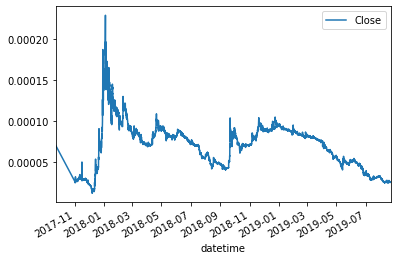

In [135]:
df[['Close']].plot()

In [146]:
df['ewma1'] = df[['Close']].ewm(com=0.5).mean()
df['ewma2'] = df[['Close']].ewm(com=0.7).mean()


In [148]:
df.tail(15)

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC,ewma,ewma1,ewma2
datetime,,,,,,,,,,,
2019-08-21 09:00:00,2019-08-21 09-AM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1889672.0,49.250,NaN,0.000026,0.000026
2019-08-21 10:00:00,2019-08-21 10-AM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1242471.0,32.270,NaN,0.000026,0.000026
2019-08-21 11:00:00,2019-08-21 11-AM,XRPBTC,0.000026,0.000026,0.000026,0.000026,863020.0,22.430,NaN,0.000026,0.000026
2019-08-21 12:00:00,2019-08-21 12-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,4035850.0,104.920,NaN,0.000026,0.000026
2019-08-21 13:00:00,2019-08-21 01-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,4199407.0,109.980,NaN,0.000026,0.000026
2019-08-21 14:00:00,2019-08-21 02-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2361924.0,61.980,NaN,0.000026,0.000026
2019-08-21 15:00:00,2019-08-21 03-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,1713291.0,45.000,NaN,0.000026,0.000026
2019-08-21 16:00:00,2019-08-21 04-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,2852540.0,75.080,NaN,0.000026,0.000026
2019-08-21 17:00:00,2019-08-21 05-PM,XRPBTC,0.000026,0.000026,0.000026,0.000026,857077.0,22.590,NaN,0.000026,0.000026


In [107]:
df[['Close']].ewm(com=0.5).mean().head(15)


,Close
datetime,
2017-09-14 04:00:00,0.001273
2017-09-14 05:00:00,0.001271
2017-09-14 06:00:00,0.001279
2017-09-14 07:00:00,0.001282
2017-09-14 08:00:00,0.001268
2017-09-14 09:00:00,0.001267
2017-09-14 10:00:00,0.001270
2017-09-14 11:00:00,0.001215
2017-09-14 12:00:00,0.001169
